In [ ]:
import tweepy
from tweepy import Stream
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
import socket
import json
import csv
import pandas as pd
from pandas import ExcelWriter

#Twitter API credentials
consumer_key = "ttoOZ8L8PmEOXpTXYa136fLbL"
consumer_secret = "6krQv2mXYyUAOIOFat6byi2IOzZSuSBMHi1SccXK0QWuQ6I0Ef"
access_key = "1526554944345866240-uo9FZuzaNLpkdUNGMzoFJz9UfXdPWj"
access_secret = "3GFeEfFSTpU97e0zRVEsC0YIdlFIEWuFeFAp7jQcr6PQo"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
csvFile = open('racism.csv', 'a')
csvWriter = csv.writer(csvFile)

In [ ]:
for tweet in tweepy.Cursor(api.search,q="#racism",count=500,
                           lang="en").items():
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text])

Streaming output truncated to the last 5000 lines.
2022-05-26 23:29:52 RT @rioferdy5: @JohnTerry26 The moment one has to start pushing their own records and stats it’s really time to start addressing the fragil…
2022-05-26 23:29:50 @W7VOA @BTS_twt @POTUS @WhiteHouse You can’t imagine how thrilled 40 million ARMY is with this honor.  BTS_twt take… https://t.co/Ia9IoMwuLV
2022-05-26 23:29:49 @GuntVision @unrulylate @TheWorldWatch @theericklouis Respectfully, the buffalo shooting was very political, as rac… https://t.co/2pgQxyl3vZ
2022-05-26 23:29:48 RT @rioferdy5: @JohnTerry26 The moment one has to start pushing their own records and stats it’s really time to start addressing the fragil…
2022-05-26 23:29:46 RT @wil_da_beast630: Interesting question for liberal debaters: in a country where the Vice President is Black and 7-8 of the top-ten incom…
2022-05-26 23:29:45 RT @eternalxrespect: So racism shouldn't be talked about because everyone knows racism exist???? Yall would not have this en

KeyboardInterrupt: ignored

In [ ]:
import re, string, unicodedata
import json
import nltk
import json
import time
import itertools  
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import tensorflow.keras.preprocessing.text as kpt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
import pandas as pd
df = pd.read_csv('racism_dataset.csv')
df

,Date,Tweet
0,5/27/2022 3:30,RT @RonRonkmfa: #FreedomIsntFree\nIt has to be...
1,5/27/2022 3:27,RT @CattleDog22: @fordnation But has Toronto l...
2,5/27/2022 3:23,I'm old enough to remember that #BlackLivesMat...
3,5/27/2022 3:18,Police stop and search Britain's top police ch...
4,5/27/2022 3:17,RT @deAdder: Thoughts and prayers. #shooting ...
...,...,...
558,5/26/2022 16:51,RT @kk131066: https://t.co/SOXI3MPDVV\n\n#Bide...
559,5/26/2022 16:50,#racism has a huge impact on individuals who e...
560,5/26/2022 16:50,"You know, some days I honestly feel the racism..."
561,5/26/2022 16:48,RT @LarryNeufeldSK: Hate is on the rise in #Ca...


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'\s*\d+\s*', '', text)
    text = re.sub('/[^\w\s]/gi', '', text)
    text = re.sub("@[^0-9a-zA-Z]+", '',text)
    text = re.sub(r'@[^\s]+', ' ', text)
    text = re.sub(r'#[^\w]+', ' ', text)
    text = re.sub(r"[.,:;+!\-_<^/=?&|$\"\(\)\d\*]", " ", text)
    text = re.sub('  +', ' ', text) 
    text = re.sub('\n+',' ',text)
    text = re.sub('\ ■',' ',text)
    text = re.sub(r'&[^\s]+', ' ', text)
    text = re.sub(r"\'s", " \'s", text)
    text = re.sub(r"\'ve", " \'ve", text)
    text = re.sub(r"n\'t", " n\'t", text)
    text = re.sub(r"\'re", " \'re", text)
    text = re.sub(r"\'d", " \'d", text)
    text = re.sub(r"\'ll", " \'ll", text)
    text = re.sub(r",", " , ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\(", " ", text)
    text = re.sub(r"\)", " ", text)
    text = re.sub(r"\?", " ? ", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r'\S*(x{2,}|X{2,})\S*',"xxx", text)
    text = re.sub(r'[^\x00-\x7F]+', "", text)
    text = re.sub('rt ', '', text)
    text = re.sub('|', '', text)

    return text

In [ ]:
df['text_clean'] = df['Tweet'].apply(clean_text)
pd.set_option('display.max_columns', None)
df.head(1)

,Date,Tweet,text_clean
0,5/27/2022 3:30,RT @RonRonkmfa: #FreedomIsntFree\nIt has to be...,ronronkmfa freedomisntfreeit has to be earned ...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['text_clean'] = df['text_clean'].apply(remove_stopwords)
df.head()

,Date,Tweet,text_clean
0,5/27/2022 3:30,RT @RonRonkmfa: #FreedomIsntFree\nIt has to be...,ronronkmfa freedomisntfreeit earned fought die...
1,5/27/2022 3:27,RT @CattleDog22: @fordnation But has Toronto l...,fordnation toronto lawyer invite arrested becu...
2,5/27/2022 3:23,I'm old enough to remember that #BlackLivesMat...,old enough remember blacklivesmatter including...
3,5/27/2022 3:18,Police stop and search Britain's top police ch...,police stop search britains top police chief s...
4,5/27/2022 3:17,RT @deAdder: Thoughts and prayers. #shooting ...,deadder thoughts prayers shooting buffalo buff...


In [ ]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [ ]:
df['text_clean'] = df['text_clean'].apply(stemm_text)
df.head()

,Date,Tweet,text_clean
0,5/27/2022 3:30,RT @RonRonkmfa: #FreedomIsntFree\nIt has to be...,ronronkmfa freedomisntfreeit earn fought die p...
1,5/27/2022 3:27,RT @CattleDog22: @fordnation But has Toronto l...,fordnat toronto lawyer invit arrest becuz didn...
2,5/27/2022 3:23,I'm old enough to remember that #BlackLivesMat...,old enough rememb blacklivesmatt includ chicag...
3,5/27/2022 3:18,Police stop and search Britain's top police ch...,polic stop search britain top polic chief six ...
4,5/27/2022 3:17,RT @deAdder: Thoughts and prayers. #shooting ...,deadder thought prayer shoot buffalo buffalost...


In [ ]:
def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    
    return text

In [ ]:
df['text_clean'] = df['text_clean'].apply(preprocess_data)
df.head()

,Date,Tweet,text_clean
0,5/27/2022 3:30,RT @RonRonkmfa: #FreedomIsntFree\nIt has to be...,ronronkmfa freedomisntfreeit earn fought die p...
1,5/27/2022 3:27,RT @CattleDog22: @fordnation But has Toronto l...,fordnat toronto lawyer invit arrest becuz didn...
2,5/27/2022 3:23,I'm old enough to remember that #BlackLivesMat...,old enough rememb blacklivesmatt includ chicag...
3,5/27/2022 3:18,Police stop and search Britain's top police ch...,polic stop search britain top polic chief six ...
4,5/27/2022 3:17,RT @deAdder: Thoughts and prayers. #shooting ...,deadder thought prayer shoot buffalo buffalost...


In [ ]:
df = df.drop(columns=['Date']) 

In [ ]:
print(df.text_clean)

0      ronronkmfa freedomisntfreeit earn fought die p...
1      fordnat toronto lawyer invit arrest becuz didn...
2      old enough rememb blacklivesmatt includ chicag...
3      polic stop search britain top polic chief six ...
4      deadder thought prayer shoot buffalo buffalost...
                             ...                        
558    biden let give chanc icc ok right becom paof i...
559    racism huge impact individu experi amp trauma ...
560    know day honest feel racism left nova scotia a...
561    larryneufeldsk hate rise canada need take acti...
562    judyjudyintexa malinibasu wfaa msnbc maddow sa...
Name: text_clean, Length: 563, dtype: object


In [ ]:
def filtering(text_clean):
    #remove link web
    text_clean = re.sub(r'https*\S+', ' ', str(text_clean))
    #remove @username
    text_clean = re.sub(r'@[^\s]+', ' ', text_clean)
    #remove #tagger
    text_clean = re.sub(r'#[^\w]+', ' ', text_clean)
    text_clean = re.sub(r"[.,:;+!\-_<^/=?&|$\"\(\)\d\*]", " ", text_clean)
    #remove extra spaces
    text_clean = re.sub('  +', ' ', text_clean) 
    #remove \n
    text_clean = re.sub('\n+',' ',text_clean)
    text_clean = re.sub('\ ■',' ',text_clean)
    text_clean = re.sub(r'&[^\s]+', ' ', text_clean)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text_clean = emoji_pattern.sub(r'', text_clean)
    return text_clean


In [ ]:
print(df.text_clean)

0      ronronkmfa freedomisntfreeit earn fought die p...
1      fordnat toronto lawyer invit arrest becuz didn...
2      old enough rememb blacklivesmatt includ chicag...
3      polic stop search britain top polic chief six ...
4      deadder thought prayer shoot buffalo buffalost...
                             ...                        
558    biden let give chanc icc ok right becom paof i...
559    racism huge impact individu experi amp trauma ...
560    know day honest feel racism left nova scotia a...
561    larryneufeldsk hate rise canada need take acti...
562    judyjudyintexa malinibasu wfaa msnbc maddow sa...
Name: text_clean, Length: 563, dtype: object


In [ ]:
df.text_clean.to_csv('clean_data.csv') 

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.9 MB/s 


In [ ]:
import pandas as pd
df = pd.read_csv('clean_data.csv')
df

,Unnamed: 0,text_clean
0,0,ronronkmfa freedomisntfreeit earn fought die p...
1,1,fordnat toronto lawyer invit arrest becuz didn...
2,2,old enough rememb blacklivesmatt includ chicag...
3,3,polic stop search britain top polic chief six ...
4,4,deadder thought prayer shoot buffalo buffalost...
...,...,...
558,558,biden let give chanc icc ok right becom paof i...
559,559,racism huge impact individu experi amp trauma ...
560,560,know day honest feel racism left nova scotia a...
561,561,larryneufeldsk hate rise canada need take acti...


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() 

def vaderSentimentAnalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Vader Sentiment'] = df['text_clean'].apply(vaderSentimentAnalysis)
df.head()

,Unnamed: 0,text_clean,Vader Sentiment
0,0,ronronkmfa freedomisntfreeit earn fought die p...,-0.5719
1,1,fordnat toronto lawyer invit arrest becuz didn...,-0.3863
2,2,old enough rememb blacklivesmatt includ chicag...,0.0000
3,3,polic stop search britain top polic chief six ...,-0.6705
4,4,deadder thought prayer shoot buffalo buffalost...,-0.7579


In [ ]:
def vader_analysis(compound):
    if compound >=  0.5:
        return 'Positive'
    elif compound <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

df['vaderSentiment'] = df['Vader Sentiment'].apply(vader_analysis)
df.head()

,Unnamed: 0,text_clean,Vader Sentiment,vaderSentiment
0,0,ronronkmfa freedomisntfreeit earn fought die p...,-0.5719,Negative
1,1,fordnat toronto lawyer invit arrest becuz didn...,-0.3863,Neutral
2,2,old enough rememb blacklivesmatt includ chicag...,0.0000,Neutral
3,3,polic stop search britain top polic chief six ...,-0.6705,Negative
4,4,deadder thought prayer shoot buffalo buffalost...,-0.7579,Negative


In [ ]:
vader_counts = df['vaderSentiment'].value_counts()
vader_counts

Negative    297
Neutral     246
Positive     20
Name: vaderSentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0d37f0d490>,
 [Text(-0.0950220315872953, 1.0958881391424142, 'Negative'),
  Text(-0.027618554288422144, -1.099653225093719, 'Neutral'),
  Text(1.3416016096503958, -0.1503499949566589, 'Positive')],
 [Text(-0.05183019904761562, 0.5977571668049532, '52.8%'),
  Text(-0.015064665975502985, -0.5998108500511194, '43.7%'),
  Text(0.8447121245946936, -0.09466481163937782, '3.6%')])

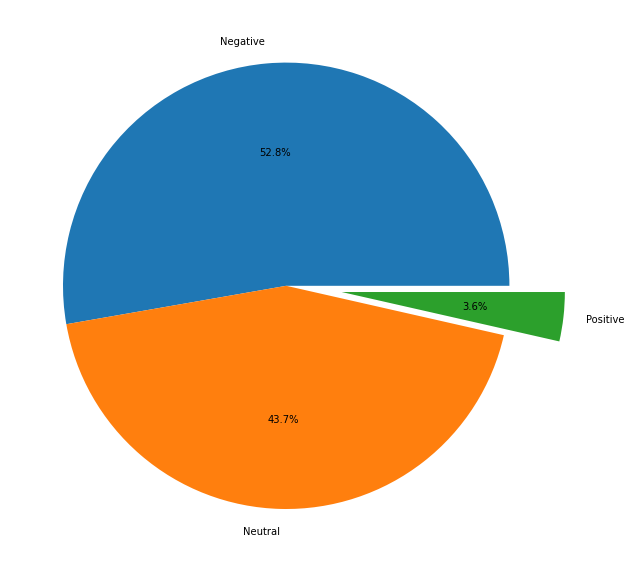

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,27))
plt.pie(vader_counts.values, labels=vader_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)